<a href="https://colab.research.google.com/github/tcmarino8/Flood-Modeling/blob/main/FloodModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we will figure out importing and early analysis of the data. We will be using the National River Flow Archive data that is avalible online. Downloaded it comes in the form of an xcel spreadhseet. I will likely use pandas to first make it into a nice dataframe that is visible for me to use. This seems to be the dataset that many people that develope these ML algorithms use.

#TimeToBegin

In [1]:
#Will have to import all my files through drive since I am not sure how to do it off the hard drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import folium
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import linear_model as lr
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [3]:
RiverFlowDataSet = pd.read_csv('/content/drive/My Drive/Job Hunt/Summer Research/nrfa-station-metadata-2023-01-09.csv')

Now the data has been imported, lets see the first 10 rows

In [4]:
RiverFlowDataSet.head(10)

,id,name,catchment-area,easting,northing,latitude,longitude,river,location,station-level,...,mean-flood-plain-depth,mean-flood-plain-location,mean-flood-plain-extent,urbext-1990,urbconc-1990,urbloc-1990,urbext-2000,urbconc-2000,urbloc-2000,data-summary
0,1001,Wick at Tarroul,161.90,326202.0,954915.0,58.47620,-3.26706,Wick,Tarroul,13.0,...,0.763,0.928,0.0922,0.0004,NaN,NaN,0.0012,NaN,NaN,gdf;gmf;cmr;cdr;cdr-d
1,2001,Helmsdale at Kilphedir,551.40,299839.0,918163.0,58.14100,-3.70295,Helmsdale,Kilphedir,17.0,...,0.671,1.069,0.0555,0.0000,NaN,NaN,0.0000,NaN,NaN,gdf;gmf;cmr;cdr;cdr-d;pot-stage;pot-flow;gaugi...
2,2002,Brora at Bruachrobie,434.40,289156.0,903916.0,58.01056,-3.87757,Brora,Bruachrobie,9.0,...,0.705,1.024,0.0553,0.0000,NaN,NaN,0.0002,NaN,NaN,gdf;gmf;cmr;cdr;cdr-d;pot-stage;pot-flow;gaugi...
3,3001,Shin at Lairg,494.60,258100.0,906200.0,58.02222,-4.40405,Shin,Lairg,81.7,...,0.742,0.893,0.0621,0.0000,NaN,NaN,0.0000,NaN,NaN,gdf;gmf;cmr;cdr;cdr-d
4,3002,Carron at Sgodachail,241.10,249136.0,892152.0,57.89321,-4.54668,Carron,Sgodachail,70.7,...,0.633,0.863,0.0377,0.0000,NaN,NaN,0.0000,NaN,NaN,gdf;gmf;cmr;cdr;cdr-d;pot-stage;pot-flow;gaugi...
5,3003,Oykel at Easter Turnaig,330.70,240305.0,900145.0,57.96185,-4.70086,Oykel,Easter Turnaig,15.6,...,0.750,0.920,0.0488,0.0000,NaN,NaN,0.0000,NaN,NaN,gdf;gmf;cmr;cdr;cdr-d;pot-stage;pot-flow;gaugi...
6,3004,Cassley at Rosehall,187.50,247176.0,902133.0,57.98210,-4.58615,Cassley,Rosehall,3.3,...,0.954,0.962,0.0557,0.0000,NaN,NaN,0.0000,NaN,NaN,gdf;gmf;cmr;cdr;cdr-d
7,3005,Shin at Inveran,575.00,257412.0,897418.0,57.94319,-4.41038,Shin,Inveran,4.3,...,0.750,0.941,0.0605,0.0002,NaN,NaN,0.0002,NaN,NaN,gdf;gmf;cmr;cdr;cdr-d
8,3006,Loch Ailsh at Loch Ailsh,44.34,231577.0,910138.0,58.04828,-4.85531,Loch Ailsh,Loch Ailsh,154.3,...,0.731,0.781,0.0505,0.0003,NaN,NaN,0.0000,NaN,NaN,gdf;gmf;cmr;cdr;cdr-d
9,4001,Conon at Moy Bridge,961.80,248129.0,854675.0,57.55658,-4.53997,Conon,Moy Bridge,10.0,...,0.885,0.868,0.0470,0.0002,NaN,NaN,0.0001,NaN,NaN,gdf;gmf;cmr;cdr;cdr-d


In [5]:
print('\033[4;43;43m Here is a list of all the column names: \033[0;0m \n\n')
for i in range(103):
  print(RiverFlowDataSet.columns[i])

 Here is a list of all the column names:  


id
name
catchment-area
easting
northing
latitude
longitude
river
location
station-level
measuring-authority-id
measuring-authority-station-id
hydrometric-area
opened
closed
station-type
bankfull-flow
structurefull-flow
sensitivity
nrfa-mean-flow
nrfa-peak-flow
feh-pooling
feh-qmed
feh-neither
nhmp
benchmark
live-data
eflag
historic-droughts
marius
outlook-analogues
outlook-esp
factors-affecting-runoff
gdf-start-date
gdf-end-date
gdf-mean-flow
gdf-min-flow
gdf-first-date-of-min
gdf-last-date-of-min
gdf-max-flow
gdf-first-date-of-max
gdf-last-date-of-max
gdf-q95-flow
gdf-q70-flow
gdf-q50-flow
gdf-q10-flow
gdf-q05-flow
gdf-base-flow-index
gdf-day-count
gdf-flow-count
gdf-percent-complete
peak-flow-start-date
peak-flow-end-date
qmed
minimum-altitude
10-percentile-altitude
50-percentile-altitude
90-percentile-altitude
maximum-altitude
saar-1941-1970
saar-1961-1990
lcm2000-woodland
lcm2000-arable-horticultural
lcm2000-grassland
lcm2000-mountain-he

In [109]:
#let us check what each of the columns are/are they important?
#print(RiverFlowDataSet['catchment-area'])      This is the area around the river where rainfall will flow into the river(km^2)
#print(RiverFlowDataSet['station-level'])       I would assume that this is the level of water at the station that it is being measured at above Ordanance Datum(m)
#print(RiverFlowDataSet['bankfull-flow'])        Flow of bankful, unsure what this means. However I notice a lot of NaN
#print(RiverFlowDataSet['structurefull-flow'])    Appears to be all NaN
#print(RiverFlowDataSet['sensitivity'])            Lots of values around 15 
#gdf is gauged daily flows (mean river flow in cubic meters per second)  and there are a lot of statistics about them
#nrfa-mean-flow, nrfa-peak-flow, feh-pooling, feh-qmed, feh-neither, nhmp, benchmark, live-data, eflag, historic-droughts, marius, outlook-analogues, outlook-esp.       (all categories of row entry (T/F))
#print(RiverFlowDataSet['factors-affecting-runoff'])         lots of NaN and then some letters(R,H,E,N) 
#minimum-altitude, 10-percentile-altitude, 50-percentile-altitude, 90-percentile-altitude, maximum-altitude.          all under elevation, stats about catchment area
#lcm2000-woodland, lcm2000-arable-horticultural, lcm2000-grassland, lcm2000-mountain-heath-bog, lcm2000-urban.         all about land cover map for a year, values less than 1
#high-perm-bedrock, moderate-perm-bedrock, low-perm-bedrock, mixed-perm-bedrock, high-perm-superficial, low-perm-superficial, mixed-perm-superficial.        so it seems that these will give me a decimal for each row, but only for one of these columns
#print(RiverFlowDataSet['urbext-2000'])             Something to do with urban extent maybe how much the flood went into urban land????
#print(RiverFlowDataSet['qmed'])     Something to do with peak flow, lets see if we can figure it out.(median annual maximum flood)   INDEX OF FLOOD       associated with peak flow data.

#plt.hist(RiverFlowDataSet['qmed'], bins = 200)
#plt.hist(RiverFlowDataSet['sensitivity'], bins = 200)
#plt.hist(RiverFlowDataSet['catchment-area'], bins = 200)
#plt.scatter(RiverFlowDataSet['sensitivity'], RiverFlowDataSet['catchment-area'], .5)
#plt.scatter(RiverFlowDataSet['qmed'], RiverFlowDataSet['catchment-area'], .5)
print(RiverFlowDataSet['farl'])

0       0.860
1       0.858
2       0.845
3       0.671
4       0.974
        ...  
1597    0.917
1598    0.981
1599    0.987
1600    0.888
1601    0.993
Name: farl, Length: 1602, dtype: float64


In [8]:
longg = RiverFlowDataSet['longitude']
lat = RiverFlowDataSet['latitude']
min_long = min(longg)
max_long = max(longg)
mean_longg = np.mean(longg)
min_lat = min(lat)
max_lat = max(lat)
mean_lat = np.mean(lat)

So now I will look at some of the statistics with respect to the data table as well as the latitude and longitude. I will use the lat and long to be able to plot the river floods on a map.

In [9]:
print('the size of the dataset is: ', np.shape(RiverFlowDataSet)) 
print('there are', np.size(RiverFlowDataSet.columns), 'columns') 
print('there are ', np.size(RiverFlowDataSet['river'].unique()), 'unique rivers') 
print('the max and min longitude are respectively:', (max_long, min_long)) 
print('the max and min latitude are respectively:', (max_lat, min_lat))

the size of the dataset is:  (1602, 103)
there are 103 columns
there are  995 unique rivers
the max and min longitude are respectively: (1.53066, -7.68602)
the max and min latitude are respectively: (60.25933, 50.05007)


I will now import the folium package which is good for geospacial modeling, map forming, and other GIS related things. Then I will create a map that shows all the flood spots. It is interactive so you can zoom in on the map and click on each pin to see where and what river the flood was associated with.

In [107]:

map = folium.Map(location=[mean_lat, mean_longg], zoom_start = 6, control_scale = True)
for i in range(len(RiverFlowDataSet)):
    folium.Marker([RiverFlowDataSet.loc[i, 'latitude'], RiverFlowDataSet.loc[i, 'longitude']], popup = RiverFlowDataSet.loc[i, 'name']).add_to(map)

In [108]:
map

We first need to identify how we are going to predict these floods/what it is we will be keeping track of and wanting to model. For this I will need to do some reading of the paper that led me to this data set. So after reading some of this paper linked here: https://link.springer.com/article/10.1007/s10666-020-09713-x they appear to use a multiple linear regression model. I will try to train and test a model in the same fassion. They use Catchment-area, standard average annual rainfall, indext of flood attenuation attributable to reservoirs and lakes, and based flow index. I dont think I will use this method, instead I will hope to train an artificial nueral net using Keras package to do so.

Now that we have a map we might as well split this data into training and testing sets. We will have 80% of the data be training and 20% of the data be for testing. Later we will include a validation set. So it will be 80:10:10 train:valid:test. 

It seems that what I am trying to predict is the qmed data from the rest of the data. I will now go ahead and attempt to do so.

In [12]:
X = RiverFlowDataSet[['catchment-area', 'station-level', 'sensitivity', 'minimum-altitude', 'maximum-altitude', 'gdf-mean-flow', 'gdf-max-flow', 'mean-flood-plain-extent']].fillna(0)
y = RiverFlowDataSet['qmed'].fillna(0)
train_df, test_df = train_test_split(RiverFlowDataSet, test_size = .2)
print('the shape of the training df is:', np.shape(train_df), '\n The shape of the test df is: ', np.shape(test_df))
X_train = train_df[['catchment-area', 'station-level', 'sensitivity', 'minimum-altitude', 'maximum-altitude', 'gdf-mean-flow', 'gdf-max-flow', 'mean-flood-plain-extent']].fillna(0)
X_test = test_df[['catchment-area', 'station-level', 'sensitivity', 'minimum-altitude', 'maximum-altitude', 'gdf-mean-flow', 'gdf-max-flow', 'mean-flood-plain-extent']].fillna(0)
y_train = train_df['qmed'].fillna(0)
y_test = test_df['qmed'].fillna(0)

print('shape of X_train, X_test, y_train, y_test respectively: ', np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

the shape of the training df is: (1281, 103) 
 The shape of the test df is:  (321, 103)
shape of X_train, X_test, y_train, y_test respectively:  (1281, 8) (321, 8) (1281,) (321,)


the mean of this column is: 334.0211735330836
the var of this column is: 761980.2635735293


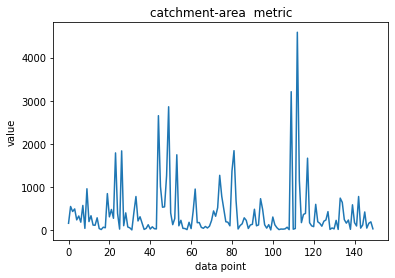

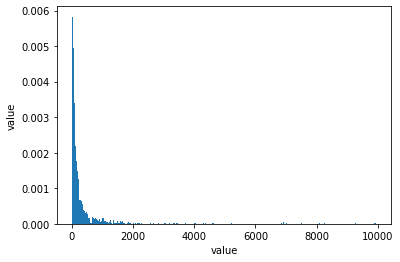

the mean of this column is: 63.31004993757803
the var of this column is: 5819.7690438177315


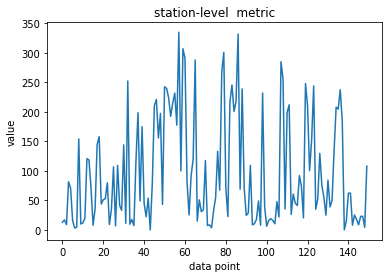

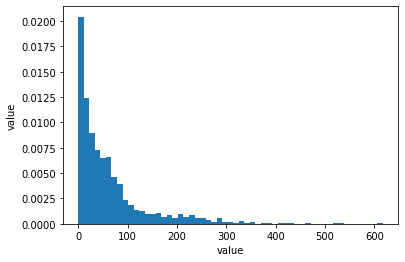

the mean of this column is: 13.200262172284644
the var of this column is: 286.2782162858225


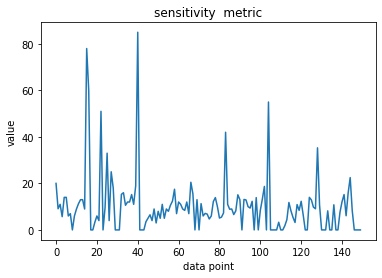

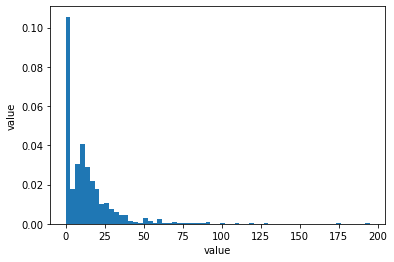

the mean of this column is: 65.50543071161047
the var of this column is: 5667.247342542328


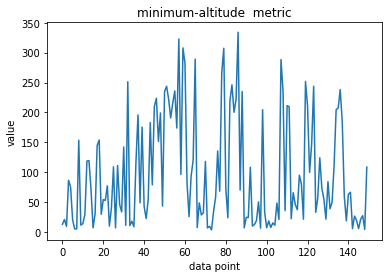

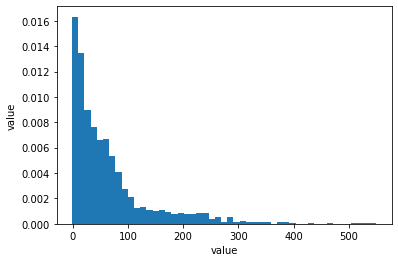

the mean of this column is: 437.36903870162297
the var of this column is: 82650.18982791486


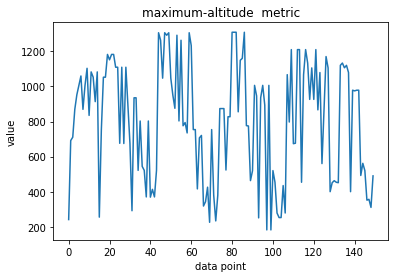

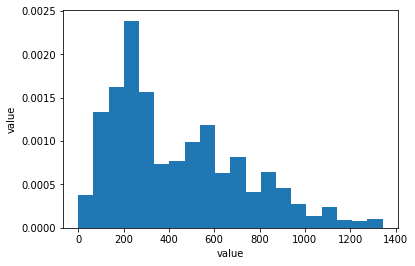

the mean of this column is: 5.834490636704119
the var of this column is: 167.3680178017226


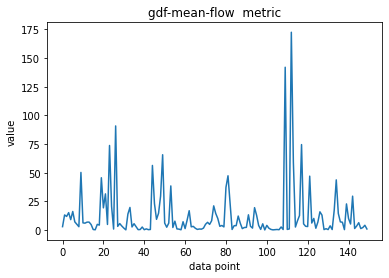

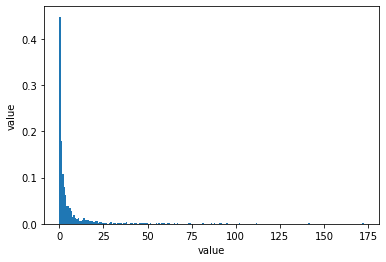

the mean of this column is: 98.40975280898877
the var of this column is: 30948.183189211057


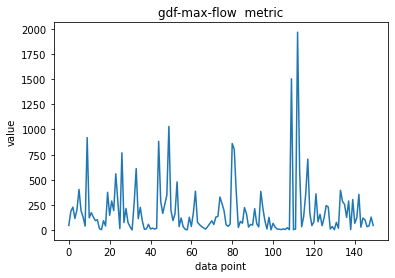

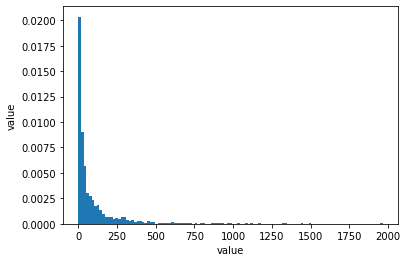

the mean of this column is: 0.06928739076154806
the var of this column is: 0.002745330365351675


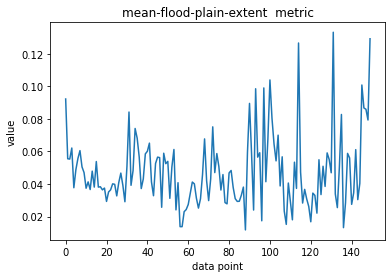

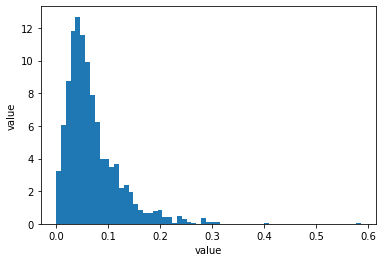

In [62]:

for column in X.columns:
  print('the mean of this column is:', np.mean(X[column]))
  print('the var of this column is:', np.var(X[column]))
  plt.plot(range(150), X[column][:150])
  plt.xlabel('data point')
  plt.ylabel('value')
  plt.title(f'{column}  metric')
  plt.show()
  plt.hist(X[column], bins = 'auto', density = True)
  plt.xlabel('value')
  plt.ylabel('value')
  plt.show()
# plt.hist(X['catchment-area'][:150], density = True)
# plt.title('catchment area histogram')
# plt.show()


In [64]:
kfold = KFold(n_splits=6, shuffle=True, random_state=42)
regression_model = lr.LinearRegression()
scores = []
for i, (train, test) in enumerate(kfold.split(X, y)):
 regression_model.fit(X.iloc[train,:], y.iloc[train])
 score = regression_model.score(X.iloc[test,:], y.iloc[test])
 scores.append(score)
print(scores)


[0.780262378002883, 0.737414119798312, 0.6472639504005682, 0.2884873954113897, 0.6255870589236391, 0.7552949127538588]


the coefficients are:  [-8.67626127e-03  3.94587670e-02  2.21009534e-03 -8.25675836e-02
  1.24533663e-02 -1.45545927e+00  5.67622517e-01 -7.23011688e+01]
the intercept is:  6.844999432386949
the score for the regression model is:  0.7203820168004942


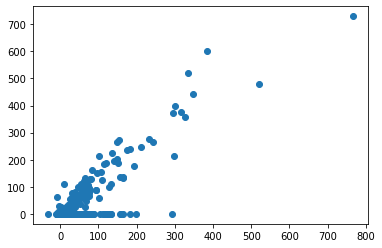

In [65]:

regression_model.fit(X_train, y_train)
print('the coefficients are: ', regression_model.coef_)
print('the intercept is: ', regression_model.intercept_)
predicted_qmed = regression_model.predict(X_test)
print('the score for the regression model is: ',regression_model.score(X_test, y_test))
plt.scatter(predicted_qmed, y_test)

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Ok so I dont really think that the AMAX is that useful, but I do have the peak flow data. This could be useful. Right now it is stored under the filepath
 "C:\Users\tyler\Desktop\For Oxford research\csv files"

 Then I will have the data that about max flow and is suitable for qmed (aka within 30% of real qmed). So the next step is to incorporate the two main datasets, that will be RiverFlowDataset and the max flows for each river. 

 The tricky part is that the max flows does daily readings, so I will likely have to expand the RiverFlowDataset or figure out how to run algorithms on both data sets simultaneously. I was thinking that if I have the trianing data, for each river, it can check if it has associated peak flow data and then absorb that knowledge. This will be hard to do, I will have to do further research/trial and error to figure this part out.

Alright, so if we look at the cell below, we see some valuable things. We can go into the files in dir which is all the csv files of max flow data for each river station that its available. Then we can get the unique id for each station by writing the final two lines below. The thing that I am struggling with now is how I should combine the data sets. Maybe I can make a database, with all the id's and their coresponding data. Lets think a bit and see what we can do.

In [ ]:
dir = '/content/drive/My Drive/csv files'
print('in the csv files folder, there are', len(os.listdir(dir)), 'files that are of use')
pd.read_csv('/content/drive/My Drive/csv files/004005.csv', skiprows = 2)
# pd.read_csv('/content/drive/My Drive/csv files/004005.csv', error_bad_lines = False)
# pd.read_csv('/content/drive/My Drive/csv files/004005.csv', nrows = 1).columns
name = pd.read_csv('/content/drive/My Drive/csv files/004005.csv', nrows = 1)
#name['Meig at Glenmeanie']

in the csv files folder, there are 306 files that are of use


In [ ]:
def pullFile(fileNum):
  #fileNum += '.csv'
  filed = '/content/drive/My Drive/csv files/'
  filed += fileNum
  return pd.read_csv(filed, skiprows = 2)

               DATE  STAGE (m)  FLOW (m^3/s) RATING           SOURCE  COMMENT  \
0  10/01/1986 08:30      1.413         53.67     1a  Digital Archive      NaN   
1  13/01/1986 14:30      1.680         83.07     1a  Digital Archive      NaN   
2  14/01/1986 16:00      1.523         64.81     1a  Digital Archive      NaN   
3  20/01/1986 17:30      1.560         68.86     1a  Digital Archive      NaN   
4  04/03/1986 23:00      1.565         69.42     1a  Digital Archive      NaN   

   AMAX ONLY  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


62.26741666666667

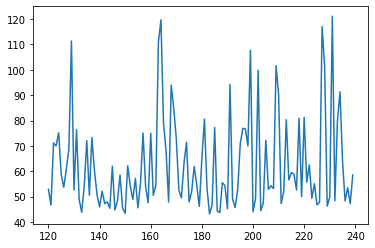

In [ ]:
id004005 = pullFile('004005.csv')
print(id004005.head(5))
threeaRating = id004005[id004005['RATING'] == '3a']
plt.plot(threeaRating['FLOW (m^3/s)'])
np.mean(threeaRating['FLOW (m^3/s)'])

78.33379310344826

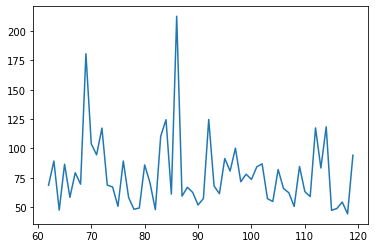

In [ ]:
twoaRating = id004005[id004005['RATING'] == '2a']
plt.plot(twoaRating['FLOW (m^3/s)'])
np.mean(twoaRating['FLOW (m^3/s)'])

74.11209677419356

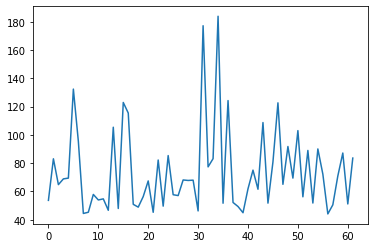

In [ ]:
oneaRating = id004005[id004005['RATING'] == '1a']
plt.plot(oneaRating['FLOW (m^3/s)'])
np.mean(oneaRating['FLOW (m^3/s)'])

In [ ]:
PeakFlowDict = {}
for fileNum in os.listdir(dir):
  PeakFlowDict[fileNum] = pullFile(fileNum)

In [ ]:
PeakFlowDict['004003.csv'].head(5)

,DATE,STAGE (m),FLOW (m^3/s),RATING,SOURCE,COMMENT,AMAX ONLY
0,12/11/1973 09:45,1.538,53.25,QHigh19731,Digital Archive,NaN,NaN
1,18/11/1973 17:45,1.739,73.29,QHigh19731,Digital Archive,NaN,NaN
2,24/11/1973 03:45,1.451,45.65,QHigh19731,Digital Archive,NaN,NaN
3,27/12/1973 15:15,1.816,81.90,QHigh19731,Digital Archive,NaN,NaN
4,18/01/1974 21:45,1.577,56.87,QHigh19731,Digital Archive,NaN,NaN


Lets Try this over again.

In [66]:
smaller_dataset = RiverFlowDataSet.iloc[:10].append(RiverFlowDataSet.iloc[520:530])
medium_dataset = RiverFlowDataSet.iloc[:10].append(RiverFlowDataSet.iloc[520:530]).append(RiverFlowDataSet.iloc[100:131])

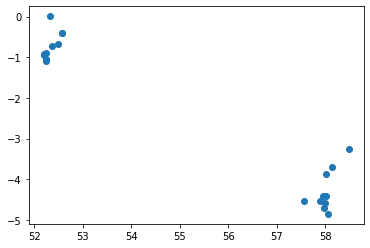

In [67]:
def get_long_lat(df):
  return [df['longitude'], df['latitude']]
long_lat = get_long_lat(smaller_dataset)
plt.scatter(long_lat[1], long_lat[0])
X_simple = smaller_dataset[['longitude', 'latitude']]

In [110]:
#this will construct a DBSCAN model and cluster it as well as print out a list of the associated labels and make a plot showing the clusters
def DBSCANclustering(df, eps):
  values_to_cluster = df[['longitude', 'latitude']]
  clustering = DBSCAN(eps=eps, min_samples=5).fit(values_to_cluster)
  labels = clustering.labels_
  df['cluster label'] = labels
  plt.scatter(df['latitude'], df['longitude'], c = labels)
  plt.show()
  return labels

#this will construct a Kmeans model and cluster it as well as print out a list of the associated labels and make a plot showing the clusters
def KMeansClustering(df, numClusters):
  values_to_cluster = df[['longitude', 'latitude']]
  kmeans = KMeans(n_clusters=numClusters, random_state=0).fit(values_to_cluster)
  labels = kmeans.labels_
  df['cluster label'] = labels
  centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
  plt.scatter(
        centers[:, 1],
        centers[:, 0],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

  plt.scatter(df['latitude'], df['longitude'], c = labels)
  plt.show()
  return labels

#This will give the unique labels associated with the model.
def get_unique_labels(labels):
  return np.unique(labels)
def minimize_df(df):
  return df[['latitude', 'longitude', 'catchment-area', 'station-level','minimum-altitude', 'maximum-altitude', 'gdf-mean-flow', 'gdf-max-flow', 'mean-flood-plain-extent', 'qmed', 'cluster label', 'id', 'saar-1961-1990', 'farl']]

def create_cluster_size_array(numClusters, labels):
  num_in_clusters = [0]*numClusters
  for cluster in labels:
    num_in_clusters[cluster] += 1
  return num_in_clusters
# clustering = DBSCAN(eps=3, min_samples=2).fit(X_simple)
# labels = clustering.labels_
# plt.scatter(smaller_dataset['latitude'], smaller_dataset['longitude'], c = clustering.labels_)
# plt.show()
# smaller_dataset['cluster label'] = labels
# smallest_dataset = smaller_dataset[['latitude', 'longitude', 'cluster label']]
# smallest_dataset

In [69]:
from IPython.utils.text import num_ini_spaces

#cluster_array_sizes = create_cluster_size_array(2, labels)
#print(cluster_array_sizes)

def size_of_testing_for_clusters(cluster_size_array):
  return [np.floor(x*.5) for x in cluster_size_array]
#print(size_of_testing_for_clusters(cluster_array_sizes))

In [70]:
values_to_cluster = smaller_dataset[['longitude', 'latitude']]
kmeans = KMeans(n_clusters=2, random_state=0).fit(values_to_cluster)
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

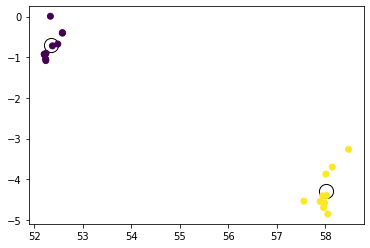

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [71]:
KMeansClustering(smaller_dataset, 2)

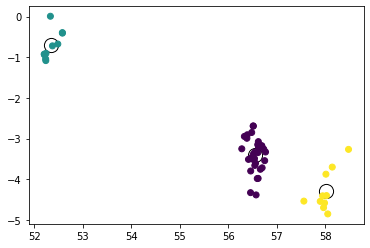

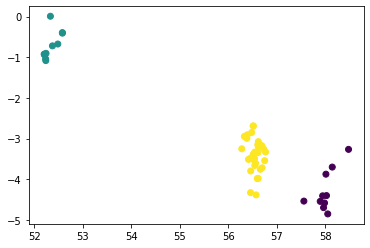

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [72]:
KMeansClustering(medium_dataset, 3)
DBSCANclustering(medium_dataset, .8)

In [111]:
minimized_medium_dataset = minimize_df(medium_dataset)
minimized_medium_dataset.head(7)

,latitude,longitude,catchment-area,station-level,minimum-altitude,maximum-altitude,gdf-mean-flow,gdf-max-flow,mean-flood-plain-extent,qmed,cluster label,id,saar-1961-1990,farl
0,58.47620,-3.26706,161.9,13.0,12.9,241.4,2.975,48.11,0.0922,NaN,0,1001,934.0,0.860
1,58.14100,-3.70295,551.4,17.0,20.9,691.6,13.187,187.60,0.0555,169.704,0,2001,1117.0,0.858
2,58.01056,-3.87757,434.4,9.0,9.4,710.8,11.897,229.70,0.0553,159.347,0,2002,1217.0,0.845
3,58.02222,-4.40405,494.6,81.7,86.5,869.5,15.200,116.90,0.0621,NaN,0,3001,1600.0,0.671
4,57.89321,-4.54668,241.1,70.7,75.4,952.4,9.100,203.30,0.0377,177.884,0,3002,1784.0,0.974
5,57.96185,-4.70086,330.7,15.6,20.3,1005.8,16.205,404.90,0.0488,352.541,0,3003,1896.0,0.915
6,57.98210,-4.58615,187.5,3.3,5.2,1059.7,7.148,193.50,0.0557,NaN,0,3004,2250.0,0.902


In [74]:
#The next step will be to get an optimization system to find the optimal amount of clusters.
from sklearn.metrics.cluster import silhouette_score
def find_optimal_clustering(df):
  values_to_cluster = df[['longitude', 'latitude']]
  silhouette_scores = []
  inertia_scores = []
  k = range(2, int(np.floor(len(df)/2)))
  for num_clusters in k:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(values_to_cluster)
    cluster_labels = kmeans.labels_
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(values_to_cluster, cluster_labels))
  plt.plot(k, silhouette_scores, 'bx-')
  plt.show()
  plt.plot(k, inertia_scores, 'bx-')
  plt.show()
  return k[np.argmax(silhouette_scores)]

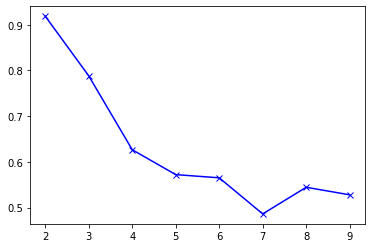

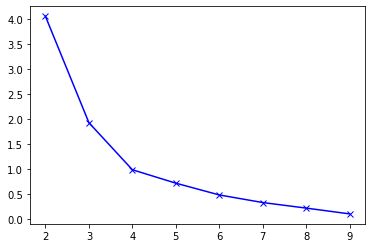

2

In [75]:
find_optimal_clustering(smaller_dataset)

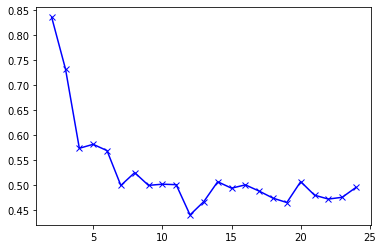

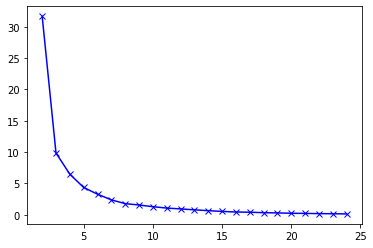

while our silouhette approach seems to be stating that two is the optimal amount for the cluster, we can see from the kmeans.inertia_ metric(elbow method) that 3 appears to be the best for number of clusters. This means that we will have to be careful and double check these


In [76]:
find_optimal_clustering(medium_dataset)
print('while our silouhette approach seems to be stating that two is the optimal amount for the cluster, we can see from the kmeans.inertia_ metric(elbow method) that 3 appears to be the best for number of clusters. This means that we will have to be careful and double check these')

Now I have a clustering algorithm. What I will try to do now is to take the respective clusters from my "medium dataset" which has 3 clusters and train a model on the limited data I have with respect to these. 

The most important thing is to understand what this QMED metric is and how I will work to model it with respect to my other data.

In [114]:
cluster0_df = minimized_medium_dataset[minimized_medium_dataset['cluster label'] == 0]
cluster1_df = minimized_medium_dataset[minimized_medium_dataset['cluster label'] == 1]
cluster2_df = minimized_medium_dataset[minimized_medium_dataset['cluster label'] == 2]

In [115]:
cluster2_df

,latitude,longitude,catchment-area,station-level,minimum-altitude,maximum-altitude,gdf-mean-flow,gdf-max-flow,mean-flood-plain-extent,qmed,cluster label,id,saar-1961-1990,farl
100,56.33090,-2.94844,307.4,6.2,7.1,520.4,4.092,68.850,0.1039,40.417,2,14001,800.0,0.992
101,56.48175,-2.85167,126.9,16.1,18.5,454.0,1.640,31.380,0.0804,NaN,2,14002,797.0,0.980
102,56.39037,-2.90811,60.0,19.0,7.6,278.8,0.578,12.780,0.0646,NaN,2,14005,723.0,0.997
103,56.51502,-2.69387,16.0,16.0,15.2,252.8,0.186,9.660,0.0542,NaN,2,14006,788.0,0.880
104,56.51242,-2.69047,29.0,10.5,11.3,252.8,0.326,6.994,0.0700,NaN,2,14007,786.0,0.882
105,56.27758,-3.25308,26.0,47.8,48.4,435.1,0.509,13.670,0.0388,NaN,2,14009,931.0,1.000
106,56.38297,-2.99414,33.0,22.0,21.1,278.8,0.309,8.191,0.0567,NaN,2,14010,738.0,0.996
107,56.76677,-3.33163,70.7,285.0,288.4,1067.3,2.705,25.400,0.0234,NaN,2,15001,1436.0,1.000
108,56.72978,-3.26004,15.4,256.0,235.9,797.2,0.486,5.678,0.0152,NaN,2,15002,1199.0,1.000
109,56.53920,-3.49294,3210.0,35.6,35.8,1210.0,141.989,1503.000,0.0406,865.004,2,15003,1609.0,0.807


In [82]:
def mse(true, pred): 
    return np.sum((true - pred)**2)

In [84]:
train_df0, test_df0 = train_test_split(cluster0_df, test_size = .3)

In [116]:
cluster0_df['BFI'] = [.39, .47, .3, .55, .29, .22, .23, .59, .29, .57]
cluster1_df['BFI'] = [0.57, 0.57, 0.6, 0.47, 0.35, 0.58, 0.86, 0.41, 0.42, 0.4]
cluster2_df['BFI'] = [0.63, 0.59, 0.57, 0.44, 0.4, 0.57, 0.55, 0.57, 0.58, 0.64, 0.64, 0.58, 0.64, 0.63, 0.59, 0.53, 0.44, 0.63, 0.44, 0.39, 0.42, 0.66, 0.39
, 0.23, 0.64, 0.43, 0.26, 0.47, 0.45, 0.43, 0.46]


<ipython-input-116-f506a315139a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0_df['BFI'] = [.39, .47, .3, .55, .29, .22, .23, .59, .29, .57]
<ipython-input-116-f506a315139a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1_df['BFI'] = [0.57, 0.57, 0.6, 0.47, 0.35, 0.58, 0.86, 0.41, 0.42, 0.4]
<ipython-input-116-f506a315139a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [117]:
cluster2_df

,latitude,longitude,catchment-area,station-level,minimum-altitude,maximum-altitude,gdf-mean-flow,gdf-max-flow,mean-flood-plain-extent,qmed,cluster label,id,saar-1961-1990,farl,BFI
100,56.33090,-2.94844,307.4,6.2,7.1,520.4,4.092,68.850,0.1039,40.417,2,14001,800.0,0.992,0.63
101,56.48175,-2.85167,126.9,16.1,18.5,454.0,1.640,31.380,0.0804,NaN,2,14002,797.0,0.980,0.59
102,56.39037,-2.90811,60.0,19.0,7.6,278.8,0.578,12.780,0.0646,NaN,2,14005,723.0,0.997,0.57
103,56.51502,-2.69387,16.0,16.0,15.2,252.8,0.186,9.660,0.0542,NaN,2,14006,788.0,0.880,0.44
104,56.51242,-2.69047,29.0,10.5,11.3,252.8,0.326,6.994,0.0700,NaN,2,14007,786.0,0.882,0.40
105,56.27758,-3.25308,26.0,47.8,48.4,435.1,0.509,13.670,0.0388,NaN,2,14009,931.0,1.000,0.57
106,56.38297,-2.99414,33.0,22.0,21.1,278.8,0.309,8.191,0.0567,NaN,2,14010,738.0,0.996,0.55
107,56.76677,-3.33163,70.7,285.0,288.4,1067.3,2.705,25.400,0.0234,NaN,2,15001,1436.0,1.000,0.57
108,56.72978,-3.26004,15.4,256.0,235.9,797.2,0.486,5.678,0.0152,NaN,2,15002,1199.0,1.000,0.58
109,56.53920,-3.49294,3210.0,35.6,35.8,1210.0,141.989,1503.000,0.0406,865.004,2,15003,1609.0,0.807,0.64


In [118]:
def calculate_e_to_QMED(df):
  return 2.117 + .851*np.ln(df['catchment-area']) - 1.8734(1000/df['saar-1961-1990']) + 3.4451*np.ln(df['farl']) - 3.08*(df['BFI'])
def calc_QMED(ln_qmed):
  return np.ln(ln_qmed)

<>:2: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<>:2: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<ipython-input-118-ec9bba95d6ce>:2: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
  return 2.117 + .851*np.ln(df['catchment-area']) - 1.8734(1000/df['saar-1961-1990']) + 3.4451*np.ln(df['farl']) - 3.08*(df['BFI'])
